# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" width=800>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [20]:
# Importando o pandas
import pandas as pd

In [21]:
# Importando o dataset de treino
data = pd.read_csv('train.csv')

In [22]:
# Visualizando essa base
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Retornando o shape da base
data.shape

(1460, 81)

In [24]:
# E as informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [25]:
# Visualizando quantidade de valores vazios
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [26]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = data.columns[(data.isnull().sum()/data.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [27]:
# Eliminando essas colunas
data = data.drop(eliminar,axis=1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Vamos **eliminar as colunas de texto**
    - Precisamos **tratar os valores vazios**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [28]:
# Selecionando apenas as colunas numéricas
colunas = data.columns[data.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
# E criar uma nova base com esses valores
base = data.loc[:,colunas]
base.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [30]:
# Verificando os valores vazios
base.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [31]:
# Substituindo os valores vazios por -1
base = base.fillna(-1)

- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [32]:
# Selecionando X e y
X = base.drop('SalePrice', axis=1)
y = base.SalePrice

In [33]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [34]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [35]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [36]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)
reg_rl

LinearRegression()

In [37]:
# Fazendo a previsão pros dados de teste
pred_rg = reg_rl.predict(X_test)

In [38]:
# Fazendo a previsão
pred_rg

array([147839.50475413, 306338.10099519, 118025.20271238, 177289.43169743,
       302365.79230627,  64678.91365165, 233249.65960676, 148392.89213285,
        61357.92875441, 154675.89814193, 148626.87457521, 108930.29694153,
        96094.12144453, 209447.47700768, 186542.20954035, 136829.86019712,
       209728.83725335, 130747.06880973, 117178.12018763, 232887.92974405,
       187540.67607979, 211413.2775903 , 191716.24070793, 131710.02606792,
       209854.1395066 , 150192.68902815, 194748.42074187,  91251.72274882,
       182726.62635774, 174826.62650753, 116313.48623901, 279396.38283042,
       250811.07131639,  82975.08919026, 276620.82156977, 157441.9295603 ,
       140478.521791  , 212709.03063194, 301804.65669104,  89531.71707603,
       144745.88372171, 245626.72852277,  97030.35926971, 285672.7244432 ,
       130797.38218474, 116508.44825339, 100437.37133204, 126677.08515157,
       366402.66680731, 123792.00374167, 101307.84277943, 214156.70084377,
        85380.82831954, 3

In [39]:
# Importando a árvore de regressão
from sklearn import tree

In [40]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_tr = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [41]:
# Fazendo a previsão
pred_tr = reg_tr.predict(X_test)
pred_tr

array([154000., 345000., 119200., 167000., 325000.,  80000., 176000.,
       148500.,  80000., 177000., 167000., 127500.,  93000., 212900.,
       175000., 109000., 202500., 145500., 109900., 213490., 139600.,
       212000., 173000., 117000., 179900., 162000., 130000.,  82500.,
       163990., 176000., 141000., 233000., 177000., 106500., 275000.,
       155000.,  79000., 193000., 354000., 115000., 141000., 233000.,
       100000., 372500., 137500., 104900., 125000., 125500., 426000.,
       145250., 117000., 180000., 118000., 430000., 140000., 240000.,
       198500., 158000., 140000., 119750.,  79900., 150750., 250000.,
       555000., 233230., 190000., 108000., 261500.,  80000., 177000.,
       118964., 124000.,  88000.,  82000., 582933., 143500., 340000.,
       290000., 139950., 145000., 106000., 108000.,  73000., 109900.,
       156932., 140200., 244600., 199900., 136500., 179400., 117000.,
       165000., 138500., 262280., 115000., 194700., 189950., 188500.,
       205000., 2000

In [42]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [43]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_kn = KNeighborsRegressor(n_neighbors=42).fit(X_train, y_train)

In [44]:
# Fazendo a previsão
pred_kn = reg_kn.predict(X_test)
pred_kn

array([142600.14285714, 268731.07142857, 146083.97619048, 143055.57142857,
       221164.33333333, 119784.11904762, 215051.07142857, 136268.42857143,
       115998.4047619 , 207862.97619048, 125322.97619048, 135611.9047619 ,
       213245.5952381 , 192308.19047619, 166108.26190476, 135463.23809524,
       177121.78571429, 136287.14285714, 147701.30952381, 194445.38095238,
       179121.11904762, 173504.28571429, 173818.97619048, 118254.76190476,
       179059.45238095, 155495.        , 172631.52380952, 221777.47619048,
       183043.45238095, 165197.95238095, 138292.        , 217671.04761905,
       229847.5952381 , 138230.47619048, 229819.4047619 , 149434.66666667,
       156226.88095238, 176776.54761905, 264567.0952381 , 157010.71428571,
       119543.21428571, 201339.33333333, 134178.57142857, 247056.52380952,
       142894.04761905, 186359.57142857, 130110.71428571, 140318.0952381 ,
       283180.28571429, 175114.28571429, 137346.66666667, 193039.76190476,
       133885.45238095, 2

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [45]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [46]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [47]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, pred_rg))
print(mean_squared_error(y_test, pred_rg))

23763.187393064058
1533982883.444886


In [48]:
# da árvore de decisão
print(mean_absolute_error(y_test, pred_tr))
print(mean_squared_error(y_test, pred_tr))

27580.78838174274
2530245114.701245


In [49]:
# e do knn
print(mean_absolute_error(y_test, pred_kn))
print(mean_squared_error(y_test, pred_kn))

36955.93682078641
3609191329.2788186


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [50]:
# Importando o matplotlib
import matplotlib.pyplot as plt

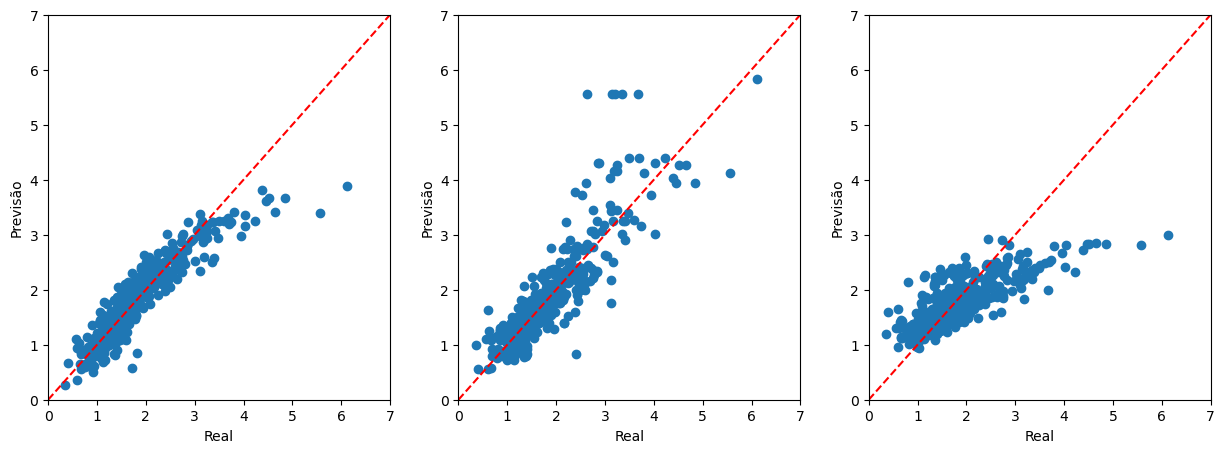

In [51]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,pred_rg/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,pred_tr/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,pred_kn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [52]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [53]:
# Visualizando a base
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [54]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [55]:
# Verificando as colunas numéricas
colunas = teste.columns[teste.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [56]:
# Mantendo também apenas as colunas numéricas
base_teste = teste.loc[:,colunas]

In [57]:
# Verificando a base restante
base_teste.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [58]:
# Visualizando quantidade de valores vazios
base_teste.isnull().sum().sort_values(ascending=False).head(12)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
WoodDeckSF       0
dtype: int64

- **Vamos precisar retirar os valores vazios pois a regressão linear não vai conseguir trabalhar com valores vazio**
    - Se tentarmos usar essa base, ele vai retornar um **erro** dizendo que o **input possui valores NaN**
- Podemos apenas substituir por -1 como fizemos acima

In [59]:
# Substituindo os valores vazios por -1
base_teste = base_teste.fillna(-1)

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [60]:
# Vamos usar a regressão para fazer a previsão
y_pred = reg_rl.predict(base_teste)

In [61]:
# Podemos adicionar essa coluna de previsão na nossa base
base_teste['SalePrice'] = y_pred

In [62]:
# E extrair somente o Id e o SalePrice
resultado = base_teste[['Id', 'SalePrice']]
resultado.head()

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229


In [63]:
# Podemos então exportar essa base
resultado.to_csv('resultado.csv', index=False)

- **Próximos passos**
    - Você pode tentar melhorar a limpeza dos seus dados 
        - [Limpeza de Dados em um Dataset Real - Dados do Titanic](https://www.youtube.com/watch?v=RuDxj894BXQ&t=1218s)
    - Depois é possível fazer a engenharia de recursos
        - [Feature Engineering em Python para Seus Projetos de Ciência de Dados](https://www.youtube.com/watch?v=rigZ7HdfWaM&t=61s)
    - A padronização / normalização dos dados
        - [Padronização e Normalização de Dados para Ciência de Dados](https://www.youtube.com/watch?v=L6rLSYVBfyM&t=12s)
    - E até a seleção de variáveis
        - [Seleção de Recursos (Feature Selection) em Projetos de Ciência de Dados](https://www.youtube.com/watch?v=0yM07AURFRY&t=615s)